In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import bayesflow as bf

2024-04-20 16:39:28.550752: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-04-20 16:39:28.599294: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-20 16:39:28.842423: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-20 16:39:28.842471: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-20 16:39:28.892787: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to

In [3]:
np.set_printoptions(suppress=True)

RNG = np.random.default_rng(1069)

In [4]:
N_OBS = 4000
(DISP_X, DISP_Y) = (2560, 1080)
PARAM_NAMES = ["$\mu$", "$\sigma$"]

<Axes: >

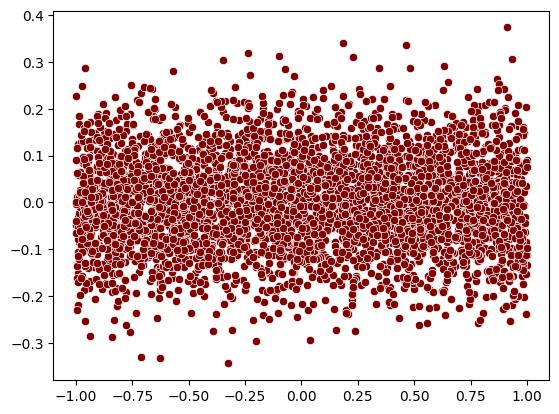

In [10]:
y = RNG.normal(0., 0.1, size=N_OBS)
x = RNG.uniform(-1., 1., size=N_OBS)

sns.scatterplot(x=x, y=y, color='maroon')

In [24]:
def prior(rng=None):
    """
    Generate prior parameters for vertical gaze distribution.
    """
    if rng is None:
        rng = np.random.default_rng()

    mu = rng.normal(0, 1)
    sigma = rng.gamma(2, 2)

    theta = np.array([mu, sigma])

    return theta

In [17]:
def gaze_simulator(theta, N_OBS=100, rng=None):

    mu, sigma = theta

    if rng is None:
        rng = np.random.default_rng()


    x = rng.uniform(-1., 1., size=N_OBS)
    y = rng.normal(mu, sigma, size=N_OBS)

    gaze_xy = np.array([x, y])
    return gaze_xy

<Axes: >

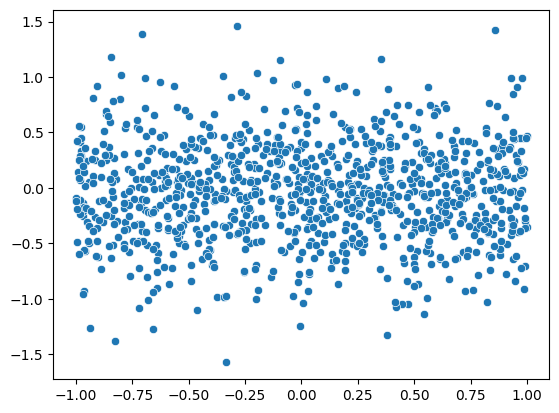

In [25]:
theta = prior()
gaze_xy = gaze_simulator(theta, N_OBS=1000)

sns.scatterplot(x=gaze_xy[0], y=gaze_xy[1])